In [86]:
import pandas as pd

In [87]:
df = pd.read_csv("/workspaces/swiss-tourism-insights/data/hotels_list.csv")

# General information about the data
df.info()

# First few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   hotel            175 non-null    object
 1   place            175 non-null    object
 2   price_per_night  175 non-null    object
 3   rating           175 non-null    object
 4   review_counter   175 non-null    object
dtypes: object(5)
memory usage: 7.0+ KB


,hotel,place,price_per_night,rating,review_counter
0,Hard Rock Hotel Davos,Davos,€ 225,"8,4",1.653 Bewertungen
1,City Hotel Biel Bienne Free Parking,Biel/Bienne,€ 175,"7,7",1.225 Bewertungen
2,Vienna House by Wyndham zur Bleiche Schaffhausen,Schaffhausen,€ 173,"8,3",1.879 Bewertungen
3,Enjoy 1313AG Hotel Touring,Chiasso,€ 130,"8,2",1.505 Bewertungen
4,BERG & BERG HOTEL - Kerns Self-Check-in,Kerns,€ 569,"8,8",455 Bewertungen


In [88]:
#Drop duplicate rows
df.drop_duplicates(inplace=True)
print(f"Removed duplicates. New shape: {df.shape}")

Removed duplicates. New shape: (175, 5)


In [89]:
#Check for missing values
df.isnull().sum()

#Drop rows with critical missing data
df = df.dropna(subset=["hotel", "price_per_night"])

In [90]:
#Convert Data Types
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["price_cleaned"] = df["price_per_night"].str.extract(r"(\d+)").astype(float)  # Adjust column name if needed

# Clean the review_counter column
df["review_counter_cleaned"] = df["review_counter"].str.extract(r"([\d\.]+)")  # Extract the number (with dots)
df["review_counter_cleaned"] = df["review_counter_cleaned"].str.replace(".", "", regex=False)  # Remove the dot (thousands separator)
df["review_counter_cleaned"] = pd.to_numeric(df["review_counter_cleaned"], errors="coerce")  # Convert to numeric

df.head()

,hotel,place,price_per_night,rating,review_counter,price_cleaned,review_counter_cleaned
0,Hard Rock Hotel Davos,Davos,€ 225,NaN,1.653 Bewertungen,225.0,1653
1,City Hotel Biel Bienne Free Parking,Biel/Bienne,€ 175,NaN,1.225 Bewertungen,175.0,1225
2,Vienna House by Wyndham zur Bleiche Schaffhausen,Schaffhausen,€ 173,NaN,1.879 Bewertungen,173.0,1879
3,Enjoy 1313AG Hotel Touring,Chiasso,€ 130,NaN,1.505 Bewertungen,130.0,1505
4,BERG & BERG HOTEL - Kerns Self-Check-in,Kerns,€ 569,NaN,455 Bewertungen,569.0,455


/tmp/ipykernel_32731/3874559755.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hotel_counts, x="place", y="number_of_hotels", palette="viridis")


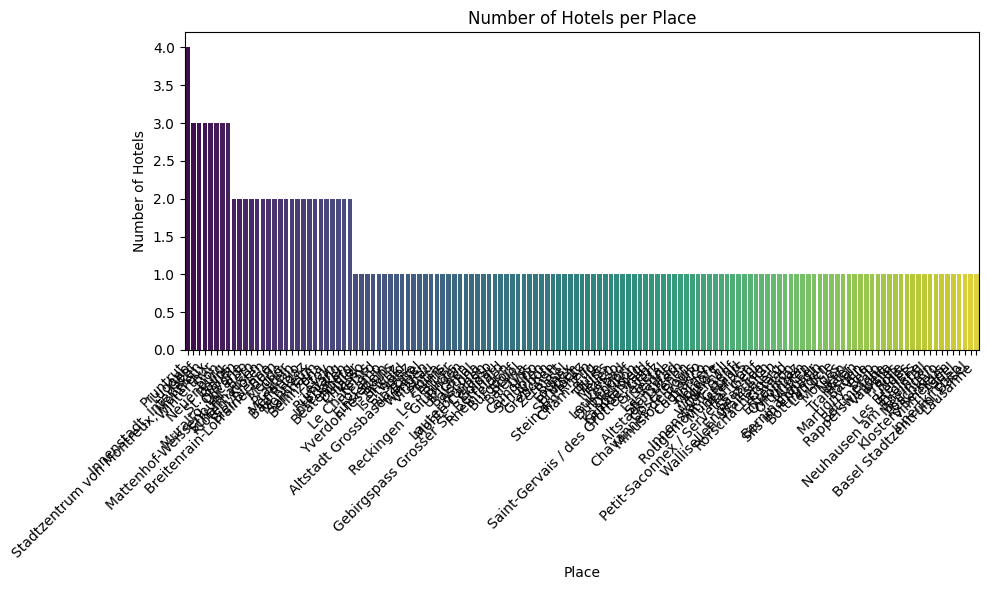

In [91]:
#Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Count hotels per place
hotel_counts = df["place"].value_counts().reset_index()
hotel_counts.columns = ["place", "number_of_hotels"]

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=hotel_counts, x="place", y="number_of_hotels", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Number of Hotels per Place")
plt.xlabel("Place")
plt.ylabel("Number of Hotels")
plt.tight_layout()
plt.show()

/tmp/ipykernel_32731/411540418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="place", y="price_cleaned", palette="Set2")


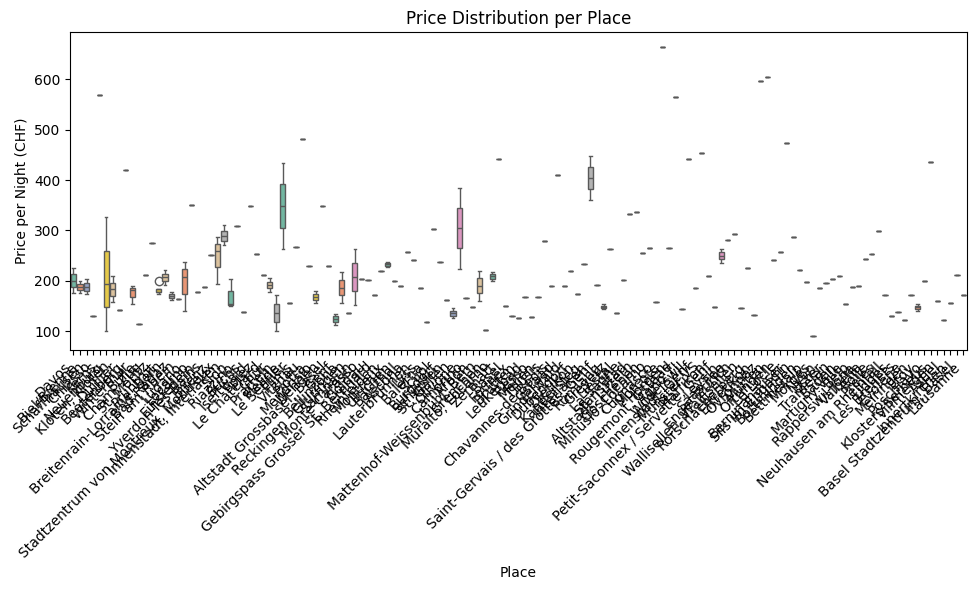

In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="place", y="price_cleaned", palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title("Price Distribution per Place")
plt.xlabel("Place")
plt.ylabel("Price per Night (CHF)")
plt.tight_layout()
plt.show()

/tmp/ipykernel_32731/1327107856.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


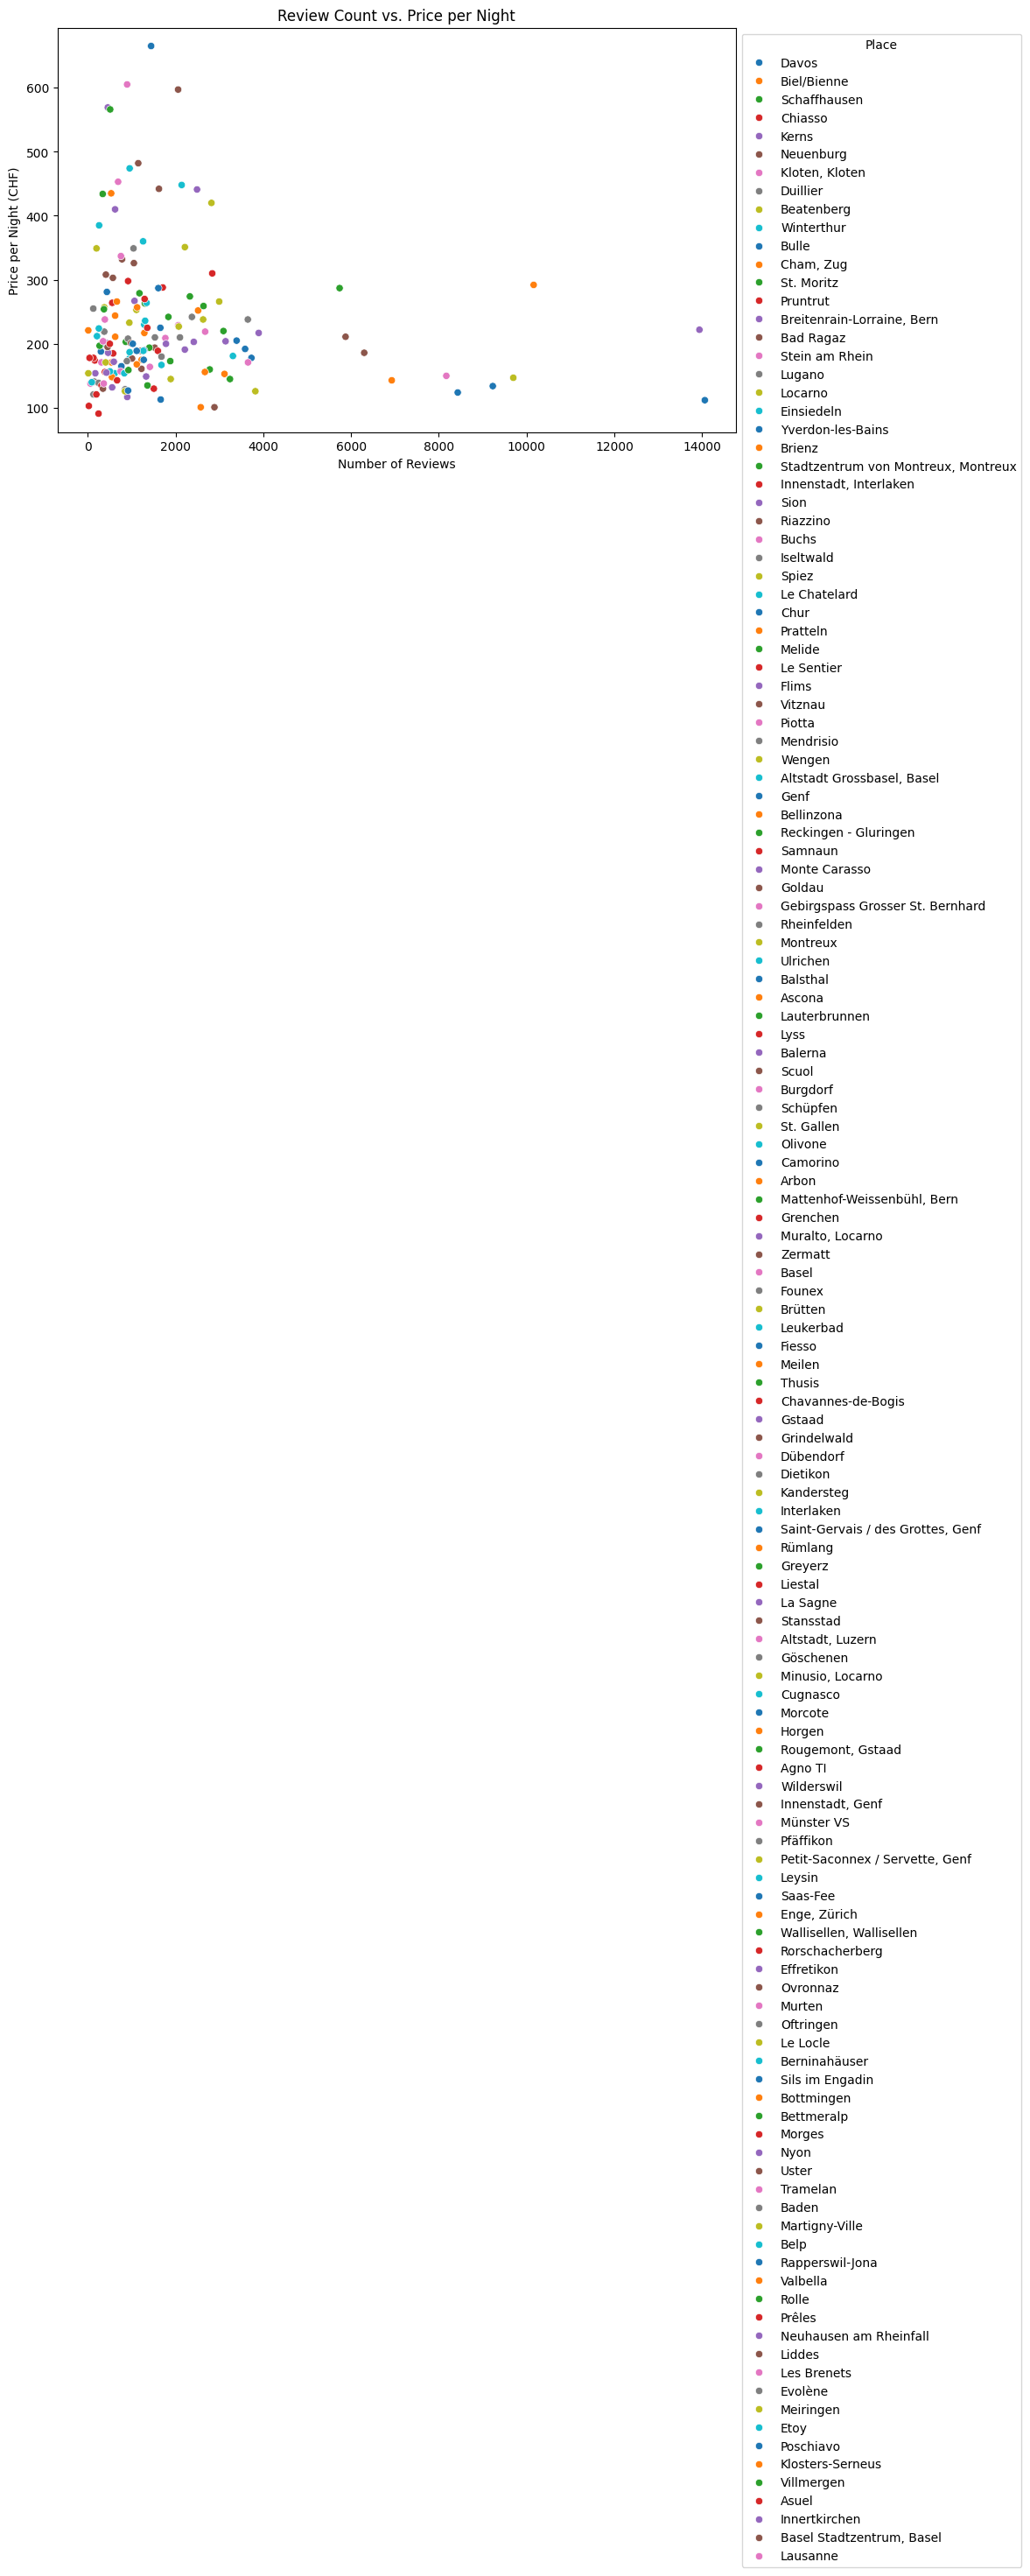

In [93]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="review_counter_cleaned", y="price_cleaned", hue="place", palette="tab10")
plt.title("Review Count vs. Price per Night")
plt.xlabel("Number of Reviews")
plt.ylabel("Price per Night (CHF)")
plt.legend(title="Place", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

/tmp/ipykernel_32731/1783750715.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hotels, y="hotel", x="review_counter_cleaned", palette="coolwarm")


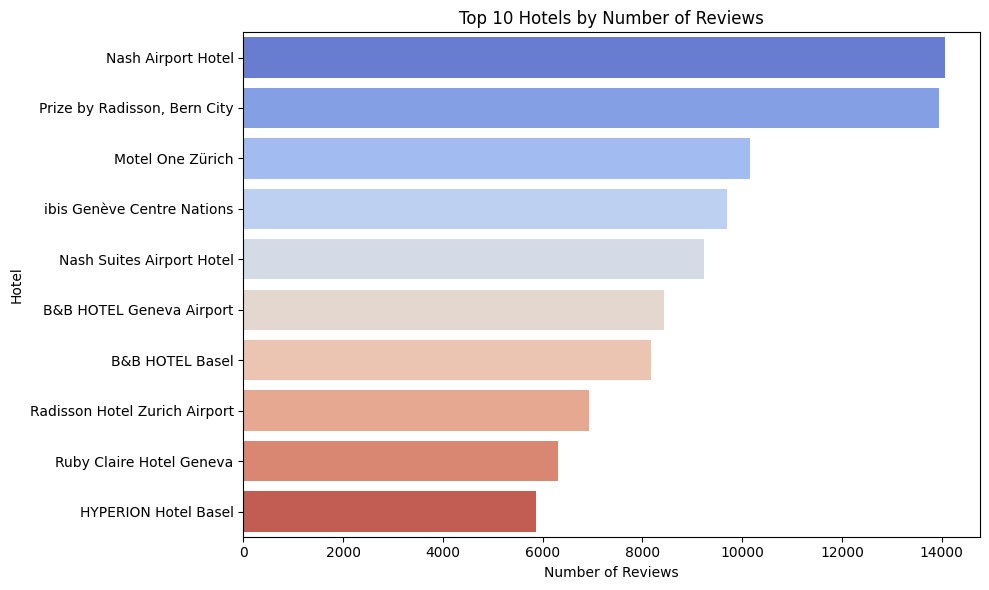

In [94]:
top_hotels = df.sort_values("review_counter_cleaned", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_hotels, y="hotel", x="review_counter_cleaned", palette="coolwarm")
plt.title("Top 10 Hotels by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Hotel")
plt.tight_layout()
plt.show()